In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
figwidth=3.3
sns.set()
sns.set_palette('colorblind')
sns.set_context('paper', font_scale=0.75)
sns.set_style("whitegrid")
figsize=(figwidth, figwidth/1.5)
from categoricalhack import boxplot


def removeprefix(self: str, prefix: str, /) -> str:
    if self.startswith(prefix):
        return self[len(prefix):]
    else:
        return self[:]
%config InlineBackend.figure_format = 'retina'


In [21]:
nepisodes = 200000
path = f"logs/paperrun2/e{nepisodes}//"

shortname = ''.join(removeprefix(path, 'logs/').split('/'))
print(shortname)
figdir = "figures/" + shortname + "/"
os.makedirs(figdir, exist_ok=True)

paperrun2e200000


In [22]:
a = pd.read_csv(path+ "/ppobiglr/evalatend.csv.gz")
a["algo"] = "PPO-MLP"

b = pd.read_csv(path + "/cmafixed/evalatend.csv.gz")
b["algo"] = "CMA-ES"

c = pd.read_csv("logs/paperrun3/bignetfastredo/evalatend.csv.gz")
c["algo"] = "PPO-DEEP"

a = pd.concat((a, b, c))

a = a.groupby(["algo", "p", "trial_id"], as_index=False).mean()
if False:
    aout = a.set_index(["p", "trial_id"])
    op = a.groupby(["p", "trial_id"])["inv"].std()
    aout["inv_std"] = op
    op = a.groupby(["p", "trial_id"])["inv"].mean()
    aout["inv_mean"] = op

a["Algorithm"] = a["algo"]

In [23]:
a.groupby(["p", "algo"]).count()

trial_id  Unnamed: 0  ep  reward  run_id  good_site_prob  \
p    algo                                                                 
0.10 CMA-ES          24          24  24      24      24              24   
     PPO-DEEP        24          24  24      24      24              24   
     PPO-MLP         24          24  24      24      24              24   
0.20 CMA-ES          24          24  24      24      24              24   
     PPO-DEEP        23          23  23      23      23              23   
     PPO-MLP         24          24  24      24      24              24   
0.50 CMA-ES          24          24  24      24      24              24   
     PPO-DEEP        24          24  24      24      24              24   
     PPO-MLP         24          24  24      24      24              24   
1.00 CMA-ES          24          24  24      24      24              24   
     PPO-DEEP        24          24  24      24      24              24   
     PPO-MLP         24          24  24      24      24              24   

               Algorithm  
p    algo                 
0.10 CMA-ES           24  
     PPO-DEEP         24  
     PPO-MLP          24  
0.20 CMA-ES           24  
     PPO-DEEP         23  
     PPO-MLP          24  
0.50 CMA-ES           24  
     PPO-DEEP         24  
     PPO-MLP          24  
1.00 CMA-ES           24  
     PPO-DEEP         24  
     PPO-MLP          24

In [24]:
alg_order = ["CMA-ES", "PPO-DEEP", "PPO-MLP"]

In [6]:
from statannot import add_stat_annotation

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.1_CMA-ES v.s. 0.1_PPO-DEEP: Mann-Whitney-Wilcoxon test two-sided, P_val=3.897e-08 U_stat=5.550e+02
0.1_PPO-DEEP v.s. 0.1_PPO-MLP: Mann-Whitney-Wilcoxon test two-sided, P_val=1.230e-07 U_stat=5.450e+02
0.1_CMA-ES v.s. 0.1_PPO-MLP: Mann-Whitney-Wilcoxon test two-sided, P_val=3.058e-09 U_stat=5.760e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.2_PPO-DEEP v.s. 0.2_PPO-MLP: Mann-Whitney-Wilcoxon test two-sided, P_val=2.460e-07 U_stat=5.190e+02
0.2_CMA-ES v.s. 0.2_PPO-DEEP: Mann-Whitney-Wilcoxon test two-sided, P_val=2.258e-03 U_stat=4.200e+02
0.2_CMA-ES v.s. 0.2_PPO-MLP: Mann-Whitney-Wilcoxon test two-sided, P_val=3.005e-06 U_stat=5.150e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-0

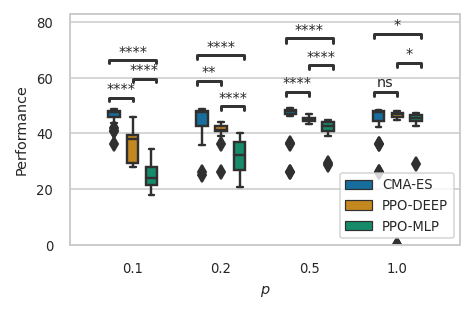

In [26]:
plt.figure(figsize=(3.3, 3.3/1.5))
ax = boxplot(data=a, x="p", y="reward", hue="Algorithm", hue_order=["CMA-ES", "PPO-DEEP", "PPO-MLP"], dodge=1.6, width=0.4)
#sns.stripplot(data=a, x="p", y="reward", hue="algo", dodge=True, ax=g.ax, color="w")
plt.ylim(0, 52)
ax.set_ylabel("Performance")
ax.set_xlabel("$p$")
plt.legend()
for p in [0.1, 0.2, 0.5, 1.0]:
    add_stat_annotation(ax, data=a, x="p", y="reward", hue="Algorithm", hue_order=["CMA-ES", "PPO-DEEP", "PPO-MLP"], verbose=2, test="Mann-Whitney",
                        box_pairs=[((p, "PPO-MLP"), (p, "CMA-ES")), ((p, "PPO-DEEP"), (p, "CMA-ES")), ((p, "PPO-MLP"), (p, "PPO-DEEP"))], comparisons_correction=None, text_format="star")
plt.tight_layout()
plt.savefig(figdir + "/score_boxplot_full.pdf")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.1_CMA-ES v.s. 0.1_PPO-DEEP: Mann-Whitney-Wilcoxon test two-sided, P_val=3.897e-08 U_stat=5.550e+02
0.1_PPO-DEEP v.s. 0.1_PPO-MLP: Mann-Whitney-Wilcoxon test two-sided, P_val=1.230e-07 U_stat=5.450e+02
0.1_CMA-ES v.s. 0.1_PPO-MLP: Mann-Whitney-Wilcoxon test two-sided, P_val=3.058e-09 U_stat=5.760e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.2_PPO-DEEP v.s. 0.2_PPO-MLP: Mann-Whitney-Wilcoxon test two-sided, P_val=2.460e-07 U_stat=5.190e+02
0.2_CMA-ES v.s. 0.2_PPO-DEEP: Mann-Whitney-Wilcoxon test two-sided, P_val=2.258e-03 U_stat=4.200e+02
0.2_CMA-ES v.s. 0.2_PPO-MLP: Mann-Whitney-Wilcoxon test two-sided, P_val=3.005e-06 U_stat=5.150e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-0

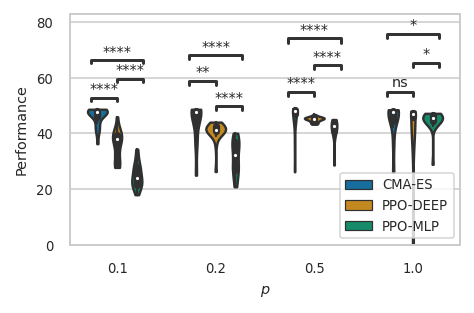

In [28]:
plt.figure(figsize=(3.3, 3.3/1.5))
ax = sns.violinplot(data=a, x="p", y="reward", hue="Algorithm", hue_order=["CMA-ES", "PPO-DEEP", "PPO-MLP"], dodge=1.4, width=0.6, cut=0)
#sns.stripplot(data=a, x="p", y="reward", hue="algo", dodge=True, ax=g.ax, color="w")
plt.ylim(0, 52)
ax.set_ylabel("Performance")
ax.set_xlabel("$p$")
plt.legend(loc="lower right")
for p in [0.1, 0.2, 0.5, 1.0]:
    add_stat_annotation(ax, data=a, x="p", y="reward", hue="Algorithm", hue_order=["CMA-ES", "PPO-DEEP", "PPO-MLP"], verbose=2, test="Mann-Whitney",
                        box_pairs=[((p, "PPO-MLP"), (p, "CMA-ES")), ((p, "PPO-DEEP"), (p, "CMA-ES")), ((p, "PPO-MLP"), (p, "PPO-DEEP"))], comparisons_correction=None, text_format="star")
plt.tight_layout()
plt.savefig(figdir + "/score_violinplot.pdf")

In [9]:
from scipy import stats

In [10]:
for name, g in a.groupby(["p"]):
    print("*"*3, name, "*"*3)
    print(stats.mannwhitneyu(g.query("Algorithm == 'PPO-MLP'")["reward"], g.query("Algorithm == 'CMA-ES'")["reward"]))

*** 0.1 ***
MannwhitneyuResult(statistic=0.0, pvalue=1.5288338590632775e-09)
*** 0.2 ***
MannwhitneyuResult(statistic=61.0, pvalue=1.502498067477524e-06)
*** 0.5 ***
MannwhitneyuResult(statistic=92.0, pvalue=2.7727409724280054e-05)
*** 1.0 ***
MannwhitneyuResult(statistic=174.0, pvalue=0.009633339435000962)


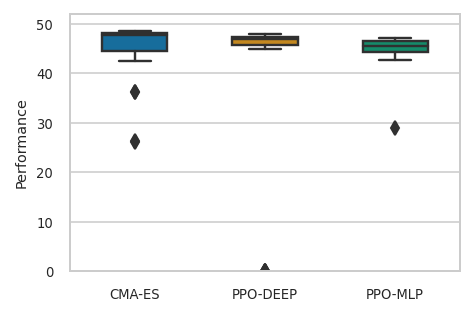

In [29]:
plt.figure(figsize=(3.3, 3.3/1.5))
ax = sns.boxplot(data=a.query("p == 1"), x="Algorithm", y="reward", dodge=True, width=0.5, order=["CMA-ES", "PPO-DEEP", "PPO-MLP"])
#sns.stripplot(data=a.query("p == 1"), x="Algorithm", y="reward", dodge=True, order=["PPO", "CMA-ES"], ax=ax)
plt.ylim(0, 52)
ax.set_ylabel("Performance")
ax.set_xlabel("")
plt.tight_layout()
plt.savefig(figdir + "/score_boxplot_1.0.pdf")

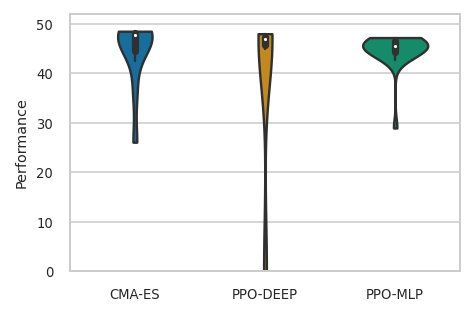

In [30]:
plt.figure(figsize=(3.3, 3.3/1.5))
ax = sns.violinplot(data=a.query("p == 1"), x="Algorithm", y="reward", dodge=True, width=0.5, cut=0, order=alg_order)
#sns.stripplot(data=a, x="p", y="reward", hue="algo", dodge=True, ax=g.ax, color="w")
plt.ylim(0, 52)
ax.set_ylabel("Performance")
ax.set_xlabel("")
plt.tight_layout()
plt.savefig(figdir + "/score_violin_1.0.pdf")

In [39]:
a.query("p == 1").groupby("algo")["reward"].agg(["mean", "std"])

,mean,std
algo,,
CMA-ES,44.42,6.62
PPO-DEEP,39.12,17.89
PPO-MLP,44.78,3.62


In [110]:
d = []
for n, g in a.groupby(["p", "Algorithm"]):
    d.append(g.sort_values("reward").iloc[-1][["Algorithm", "p","reward","trial_id"]])
pd.DataFrame(d)

,Algorithm,p,reward,trial_id
3,CMA-ES,0.10,48.68,c6304_00003
115,PPO-DEEP,0.10,45.96,c3315_00007
210,PPO-MLP,0.10,34.35,3c19e_00019
38,CMA-ES,0.20,48.68,bcd0a_00014
133,PPO-DEEP,0.20,44.06,b425b_00002
230,PPO-MLP,0.20,40.08,b636b_00015
57,CMA-ES,0.50,48.95,c3f54_00009
146,PPO-DEEP,0.50,46.80,a50be_00003
262,PPO-MLP,0.50,45.00,b613b_00023
74,CMA-ES,1.00,48.50,be044_00002


In [32]:
def cohen_d(x,y):
        return (np.mean(x) - np.mean(y)) / np.sqrt((np.std(x, ddof=1) ** 2 + np.std(y, ddof=1) ** 2) / 2.0)


In [33]:
a.query("p == 1").groupby("algo")["reward"]

In [34]:
cohen_d(a.query("p == 1 and algo == 'PPO-MLP'")["reward"],
       a.query("p == 1 and algo == 'CMA-ES'")["reward"])

0.0670330134323978

In [36]:
cohen_d(a.query("p == 1 and algo == 'PPO-MLP'")["reward"],
       a.query("p == 1 and algo == 'PPO-DEEP'")["reward"])

0.43857459259140796

In [37]:
cohen_d(a.query("p == 1 and algo == 'PPO-DEEP'")["reward"],
       a.query("p == 1 and algo == 'CMA-ES'")["reward"])

-0.39318113587238923

In [17]:
a.query("algo == 'PPO-DEEP'").groupby("p").count()

,algo,trial_id,Unnamed: 0,ep,reward,run_id,good_site_prob,Algorithm
p,,,,,,,,
0.1,24,24,24,24,24,24,24,24
0.2,23,23,23,23,23,23,23,23
0.5,24,24,24,24,24,24,24,24
1.0,24,24,24,24,24,24,24,24


In [38]:
pd.options.display.float_format = '{:,.2f}'.format
print(a.groupby(["p", "algo"])[["reward"]].agg(["median", "mad"]).to_latex())

\begin{tabular}{llrr}
\toprule
     &         & \multicolumn{2}{l}{reward} \\
     &         & median &   mad \\
p & algo &        &       \\
\midrule
0.10 & CMA-ES &  47.72 &  2.45 \\
     & PPO-DEEP &  37.83 &  4.43 \\
     & PPO-MLP &  24.04 &  3.43 \\
0.20 & CMA-ES &  47.56 &  5.32 \\
     & PPO-DEEP &  41.18 &  1.90 \\
     & PPO-MLP &  32.44 &  5.20 \\
0.50 & CMA-ES &  48.00 &  4.59 \\
     & PPO-DEEP &  45.23 &  0.70 \\
     & PPO-MLP &  42.52 &  2.62 \\
1.00 & CMA-ES &  47.64 &  4.72 \\
     & PPO-DEEP &  46.99 & 13.04 \\
     & PPO-MLP &  45.58 &  1.86 \\
\bottomrule
\end{tabular}



In [88]:
pd.options.display.float_format = "{:,.2f}".format

print(a.groupby(["p", "algo"])["reward"].agg(["median", "mad", "mean", "std"]).to_latex())

\begin{tabular}{llrrrr}
\toprule
     &         &  median &   mad &  mean &   std \\
p & algo &         &       &       &       \\
\midrule
0.10 & CMA-ES &   47.72 &  2.45 & 46.19 &  3.21 \\
     & PPO-DEEP &   37.83 &  4.43 & 35.73 &  5.16 \\
     & PPO-MLP &   24.04 &  3.43 & 24.92 &  4.23 \\
0.20 & CMA-ES &   47.56 &  5.32 & 44.03 &  6.98 \\
     & PPO-DEEP &   41.18 &  1.90 & 40.76 &  3.57 \\
     & PPO-MLP &   32.44 &  5.20 & 31.60 &  5.93 \\
0.50 & CMA-ES &   48.00 &  4.59 & 45.17 &  6.67 \\
     & PPO-DEEP &   45.23 &  0.70 & 45.06 &  0.89 \\
     & PPO-MLP &   42.52 &  2.62 & 41.49 &  4.17 \\
1.00 & CMA-ES &   47.64 &  4.72 & 44.42 &  6.62 \\
     & PPO-DEEP &   46.99 & 13.04 & 39.12 & 17.89 \\
     & PPO-MLP &   45.58 &  1.86 & 44.78 &  3.62 \\
\bottomrule
\end{tabular}



In [44]:
#data=a, x="p", y="reward", hue="Algorithm"
from statannot import stat_test



In [72]:
from itertools import combinations
pairs = list(combinations(["PPO-MLP", "PPO-DEEP", "CMA-ES"], 2))
out = []
for n, g in a.groupby("p"):
    for a1, a2 in pairs:
        x = g.query("Algorithm == @a1")["reward"]
        y = g.query("Algorithm == @a2")["reward"]
        o = stat_test(x, y, "Mann-Whitney")
        out.append({"p": n, "test": a1 + " vs " + a2, "pval": o.pval, "U-statistic": int(o.stat)})

In [73]:
outdf = pd.DataFrame(out)

In [84]:
pd.options.display.float_format = '{:,.2}'.format


In [85]:
print(outdf.set_index(["p", "test"]).to_latex())

\begin{tabular}{llrr}
\toprule
    &                    &    pval &  U-statistic \\
p & test &         &              \\
\midrule
0.1 & PPO-MLP vs PPO-DEEP & 1.2e-07 &           31 \\
    & PPO-MLP vs CMA-ES & 3.1e-09 &            0 \\
    & PPO-DEEP vs CMA-ES & 3.9e-08 &           21 \\
0.2 & PPO-MLP vs PPO-DEEP & 2.5e-07 &           33 \\
    & PPO-MLP vs CMA-ES &   3e-06 &           61 \\
    & PPO-DEEP vs CMA-ES &  0.0023 &          132 \\
0.5 & PPO-MLP vs PPO-DEEP & 6.4e-07 &           46 \\
    & PPO-MLP vs CMA-ES & 5.5e-05 &           92 \\
    & PPO-DEEP vs CMA-ES & 9.3e-05 &           98 \\
1.0 & PPO-MLP vs PPO-DEEP &   0.018 &          173 \\
    & PPO-MLP vs CMA-ES &   0.019 &          174 \\
    & PPO-DEEP vs CMA-ES &    0.12 &          212 \\
\bottomrule
\end{tabular}

